In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import pandas as pd

%matplotlib inline

In [3]:
dataset =pd.read_csv('cars.csv')

In [10]:
X=dataset[dataset.columns[:-1]]
#X = X.convert_objects(convert_numeric=True)
X = X.apply(pd.to_numeric, errors='coerce')

X.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978


In [12]:
for i in X.columns:
    X[i] = X[i].fillna(int(X[i].mean()))

for i in X.columns:
    print(X[i].isnull().sum())

0
0
0
0
0
0
0


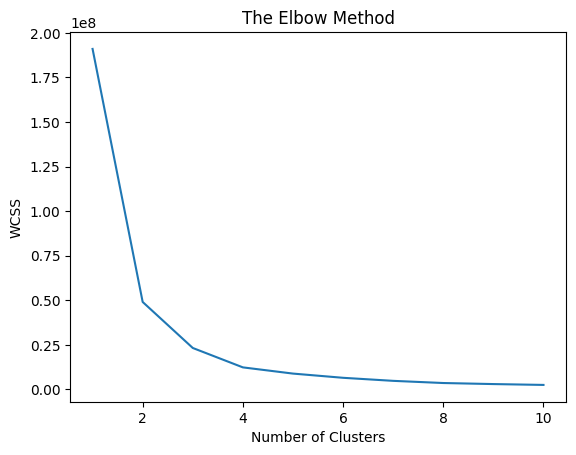

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize the list to hold the WCSS values
wcss = []

for i in range(1, 11):  # Start range from 1, as n_clusters=0 is invalid
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [19]:
# Initialize KMeans with correct parameter name
kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the model and predict clusters
y_kmeans = kmeans.fit_predict(X)

# Convert DataFrame to NumPy array
X = X.to_numpy()  

In [20]:
print(X)

[[1.400e+01 8.000e+00 3.500e+02 ... 4.209e+03 1.200e+01 1.972e+03]
 [3.190e+01 4.000e+00 8.900e+01 ... 1.925e+03 1.400e+01 1.980e+03]
 [1.700e+01 8.000e+00 3.020e+02 ... 3.449e+03 1.100e+01 1.971e+03]
 ...
 [2.200e+01 6.000e+00 2.320e+02 ... 2.835e+03 1.500e+01 1.983e+03]
 [1.800e+01 6.000e+00 2.320e+02 ... 3.288e+03 1.600e+01 1.972e+03]
 [2.200e+01 6.000e+00 2.500e+02 ... 3.353e+03 1.500e+01 1.977e+03]]


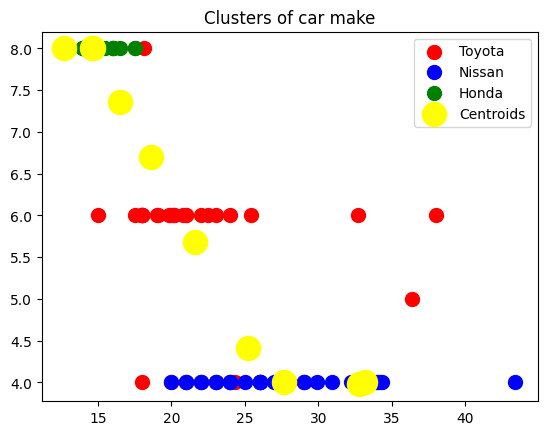

In [21]:
# Scatter plot for each cluster
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Toyota')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Nissan')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Honda')

# Scatter plot for centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

# Plot title and legend
plt.title('Clusters of car make')
plt.legend()

# Show plot
plt.show()